<a href="https://colab.research.google.com/github/Ilia-Gershen/TYP-project/blob/main/DeepLearningModelGRU_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Model GRU-LSTM:

In [1]:
#importing libraries and data from google drive
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

#for Normalization 
from sklearn import preprocessing

from google.colab import drive #connecting google drive with Database of the project
drive.mount('/content/drive')

# Importing the csv made in data preprocessing stage
ETH = pd.read_csv("/content/drive/MyDrive/Database/ETH-preprocessed.csv")
ETH.head()

Mounted at /content/drive


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-11-19,347.401001,371.290985,344.739990,354.385986,354.385986,1.181530e+09
1,1,2017-11-20,354.093994,372.136993,353.289001,366.730011,366.730011,8.070270e+08
2,2,2017-11-21,367.442993,372.470001,350.692993,360.401001,360.401001,9.499120e+08
3,3,2017-11-22,360.312012,381.420013,360.147003,380.652008,380.652008,8.008190e+08
4,4,2017-11-23,381.438995,425.548004,376.088013,410.165985,410.165985,1.845680e+09


## GRU-LSTM 1
With closing price as input and 1 week prediction window

### Data processing
Splitting data into training, validation and testing sets

(213, 7, 1)
(213, 7, 1)


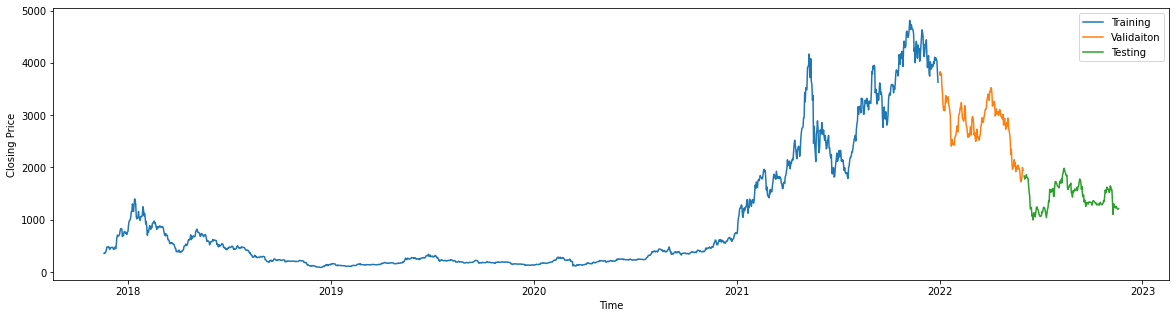

In [33]:
def Dataset(Data):

  #Swap date into right format
  Data["Date"] = pd.to_datetime(Data["Date"])

  #Data for Training 
  #From 2018 to 2022
  Train_Data = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy() #taking data befor the given date
  TrainingData = []
  TrainingDataX = []
  TrainingDataY = []

  for i in range(0, len(Train_Data), 7): #putting in close values data in form of weeks aka 7 days
    try:
      TrainingData.append(Train_Data[i : i+7]) #array of arrays of 7 close prices
    except:
      pass

  if len(TrainingData[-1]) < 7: #If last week is less then 7 days we remove last week
    TrainingData.pop(-1)

  TrainingDataX = TrainingData[0 : -1] # taking all but last element
  TrainingDataX = np.array(TrainingDataX)
  TrainingDataX = TrainingDataX.reshape((-1, 7, 1)) #split into groups of 7 

  
  TrainingDataY = TrainingData[1:len(TrainingData)] # Taking all but first element
  TrainingDataY = np.array(TrainingDataY)
  TrainingDataY = TrainingDataY.reshape((-1, 7, 1)) # split into groups of 7 and keep the order

  #Data for Validation
  #From 2022 to 2022-06
  Val_Data = Data['Close'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy() #taking data from given date to latest date
  ValData = []
  ValDataX = []
  ValDataY = []

  for i in range(0, len(Val_Data), 7):
    try:
      ValData.append(Val_Data[i : i + 7])
    except:
      pass

  if len(ValData[-1]) < 7:
    ValData.pop(-1)

  ValDataX = ValData[0 : -1]
  ValDataX = np.array(ValDataX)
  ValDataX = ValDataX.reshape((-1, 7, 1))

  ValDataY = ValData[1 : len(ValData)]
  ValDataY = np.array(ValDataY)
  ValDataY = ValDataY.reshape((-1, 7, 1))

  #Data for Testing 
  #From 2022-06 to the end

  Test_Data = Data['Close'][Data['Date'] >= '2022-06-02'].to_numpy()
  TestData = []
  TestDataX = []
  TestDataY = []

  for i in range(0, len(Test_Data), 7):
    try:
      TestData.append(Test_Data[i : i+7])
    except:
      pass

  if len(TestData[-1]) < 7:
    TestData.pop(-1)

  TestDataX = TestData[0 : -1]
  TestDataX = np.array(TestDataX)
  TestDataX = TestDataX.reshape((-1, 7, 1))

  TestDataY = TestData[1 : len(TestData)]
  TestDataY = np.array(TestDataY)
  TestDataY = TestDataY.reshape((-1, 7, 1))
 
  return TrainingDataX, TrainingDataY, ValDataX, ValDataY, TestDataX, TestDataY

ETH_Train_X, ETH_Train_Y, ETH_Val_X, ETH_Val_Y, ETH_Test_X, ETH_Test_Y = Dataset(ETH)

#graph printing to show the data split
plt.figure(figsize = (20, 5))

plt.plot(ETH['Date'][ETH['Date'] < '2021-12-30'], ETH['Close'][ETH['Date'] < '2021-12-30'], label = 'Training')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], ETH['Close'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], label = 'Validaiton')
plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

###Model

In [34]:
def Model():

  model = tf.keras.models.Sequential([ #input shape first number is number of days we will predict and second one is number of purumenters use for prediction
      tf.keras.layers.GRU(200, input_shape = (7,1), activation = tf.nn.leaky_relu, return_sequences = True),
      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu), #or make in 150 if it will not work
      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(7, activation = tf.nn.leaky_relu)
  ])

  return model

model = Model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 7, 200)            121800    
                                                                 
 lstm_12 (LSTM)              (None, 200)               320800    
                                                                 
 dense_36 (Dense)            (None, 100)               20100     
                                                                 
 dense_37 (Dense)            (None, 50)                5050      
                                                                 
 dense_38 (Dense)            (None, 7)                 357       
                                                                 
Total params: 468,107
Trainable params: 468,107
Non-trainable params: 0
_________________________________________________________________


### Learning Rate

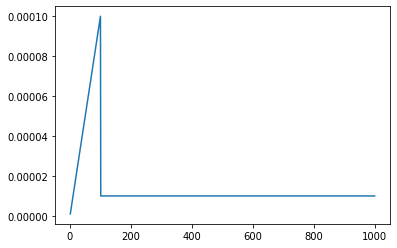

In [35]:
def scheduler(epoch):
  if epoch <= 100:
    lrate = epoch * (10 ** -6)
  else:
    lrate = 0.00001

  return lrate

epoch = [i for i in range(1, 1001)]
lrate = [scheduler(i) for i in range(1, 1001)]
plt.plot(epoch, lrate)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler) #applying new learning rate to callback that is used as input for model compilation

### Model Fitting

Epoch 1/200
7/7 [==============================] - 3s 114ms/step - loss: 2189013.0000 - root_mean_squared_error: 1479.5314 - val_loss: 7918825.5000 - val_root_mean_squared_error: 2814.0408 - lr: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 50ms/step - loss: 2188741.5000 - root_mean_squared_error: 1479.4396 - val_loss: 7916773.5000 - val_root_mean_squared_error: 2813.6760 - lr: 1.0000e-06
Epoch 3/200
7/7 [==============================] - 0s 48ms/step - loss: 2187480.5000 - root_mean_squared_error: 1479.0134 - val_loss: 7913379.0000 - val_root_mean_squared_error: 2813.0730 - lr: 2.0000e-06
Epoch 4/200
7/7 [==============================] - 0s 49ms/step - loss: 2184963.2500 - root_mean_squared_error: 1478.1622 - val_loss: 7898769.5000 - val_root_mean_squared_error: 2810.4749 - lr: 3.0000e-06
Epoch 5/200
7/7 [==============================] - 0s 54ms/step - loss: 2180036.7500 - root_mean_squared_error: 1476.4949 - val_loss: 7874819.0000 - val_root_mean_squared_error: 2

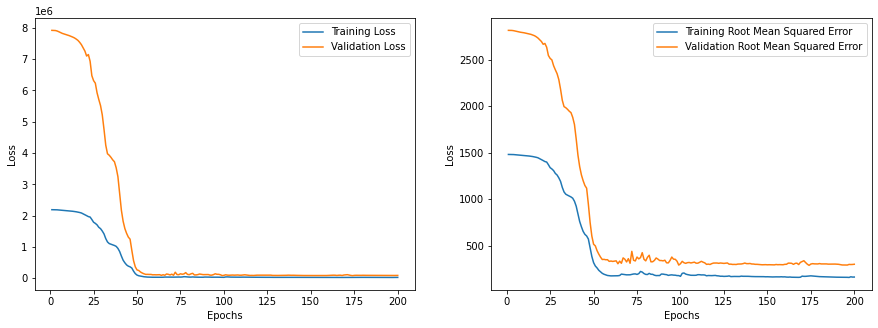

In [36]:
ETH_Model = Model()
ETH_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
ETH_hist = ETH_Model.fit(ETH_Train_X, ETH_Train_Y, epochs = 200, validation_data = (ETH_Val_X, ETH_Val_Y), callbacks = [callback])

#Plottign the Loss and RMSE graphs
historyDict = ETH_hist.history

loss = historyDict["loss"]
root_mean_squared_error = historyDict["root_mean_squared_error"]
valLoss = historyDict["val_loss"]
val_root_mean_squared_error = historyDict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, valLoss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Model Testing

1/1 [==============================] - 0s 317ms/step
RMSE: 193.3317402339085
MAPE: 10.223410426446684


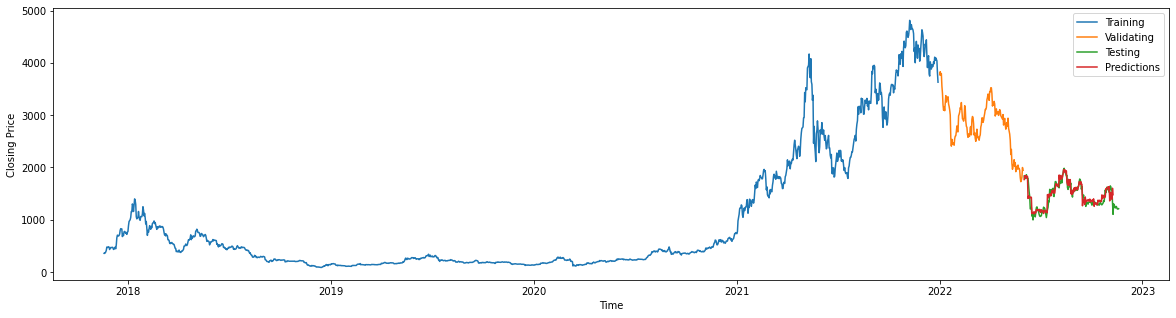

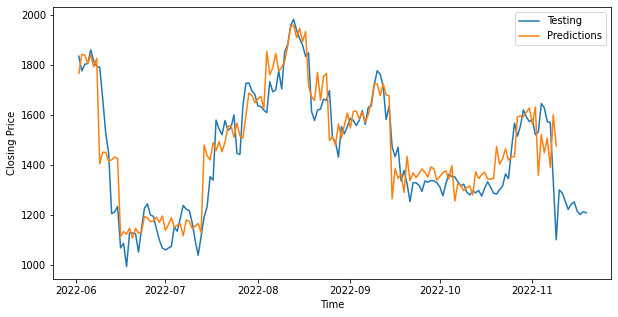

In [37]:
ETH_prediction = ETH_Model.predict(ETH_Test_X)

# Normal view 
plt.figure(figsize = (20, 5))

plt.plot(ETH['Date'][ETH['Date'] < '2021-12-30'], ETH['Close'][ETH['Date'] < '2021-12-30'], label = 'Training')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], ETH['Close'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], label = 'Validating')
plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-06-02')&(ETH['Date'] <= '2022-11-09')], ETH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

# Prediction closeup 
plt.figure(figsize = (10, 5))

plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-06-02')&(ETH['Date'] <= '2022-11-09')], ETH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

rmse = math.sqrt(mean_squared_error(ETH_Test_Y.reshape(-1,7), ETH_prediction))
mape = np.mean(np.abs(ETH_Test_Y.reshape(-1,7) - ETH_prediction )/np.abs(ETH_Test_Y.reshape(-1,7))) * 100
print(f'RMSE: {rmse}') #lower is better
print(f'MAPE: {mape}')

## GRU-LSTM 2
With closing price normalized and 1 week prediction window

### Data processing
Splitting data into training, validation and testing sets

1502
151
171
1653
(1653,)
1824
(1824,)
1
(1, 1824)
[[[0.05355683]
  [0.05440739]
  [0.05343868]
  [0.05390291]
  [0.05044105]
  [0.048566  ]
  [0.04536657]]

 [[0.04392827]
  [0.0448628 ]
  [0.04380218]
  [0.04600449]
  [0.04791034]
  [0.04614908]
  [0.04702585]]

 [[0.04731751]
  [0.04760721]
  [0.04563785]
  [0.04495193]
  [0.04398301]
  [0.04263751]
  [0.03634104]]

 [[0.03417088]
  [0.0360158 ]
  [0.03467057]
  [0.03489196]
  [0.03506379]
  [0.03442406]
  [0.03618704]]

 [[0.0368973 ]
  [0.03698796]
  [0.03819291]
  [0.03966816]
  [0.03811584]
  [0.03806339]
  [0.04238841]]

 [[0.0428297 ]
  [0.04343817]
  [0.0446457 ]
  [0.04436352]
  [0.04602361]
  [0.0437224 ]
  [0.04158992]]

 [[0.04144755]
  [0.04096594]
  [0.04167652]
  [0.04517715]
  [0.0444377 ]
  [0.04093778]
  [0.03957738]]

 [[0.03926445]
  [0.03734573]
  [0.03656672]
  [0.03749705]
  [0.03680175]
  [0.03691125]
  [0.03927631]]

 [[0.03951181]
  [0.03724846]
  [0.04147367]
  [0.04223068]
  [0.04191292]
  [0.04026986]
  [

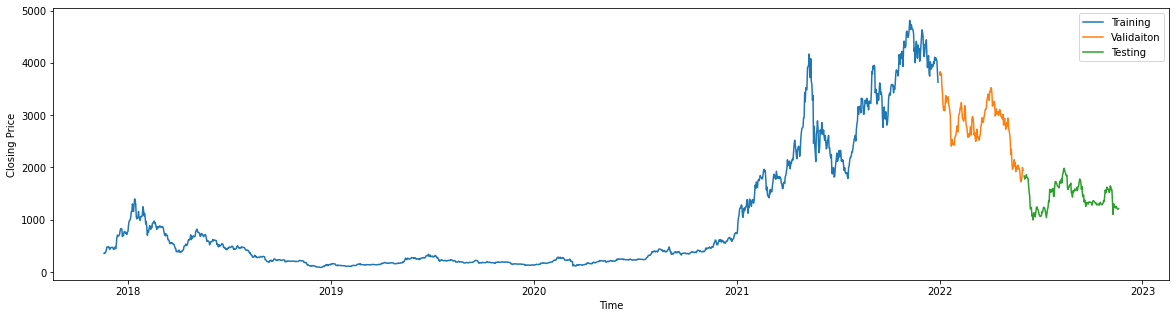

In [8]:
def Dataset(Data): #function for creation of traning and testing datasets for the models

  Data["Date"] = pd.to_datetime(Data["Date"])

  #Data for Training 
  #From 2018 to 2022
  Train_DataY = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy() #taking data befor the given date
  TrainingData = []
  TrainingDataX = []
  TrainingDataY = []

  #0+
  Train_Data = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy()
  
  #1502+
  Train_Data_Val = Data['Close'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy()
  
  #1652+
  Train_Data_Test = Data['Close'][Data['Date'] >= '2022-06-02'].to_numpy()
  
  Train_Data = np.append(Train_Data,  Train_Data_Val)
  Train_Data = np.append(Train_Data,  Train_Data_Test)

  #Normalize
  Train_Data = Train_Data.reshape(1, -1)
  Train_Data = preprocessing.normalize(Train_Data)

  #The training output of the model in TrainingDataY
  for i in range(0, len(Train_DataY), 7): #putting in close values data in form of weeks aka 7 days
    try:
      TrainingData.append(Train_DataY[i : i+7]) #array of arrays of 7 close prices
    except:
      pass

  if len(TrainingData[-1]) < 7: #If last week is less then 7 days we remove last week
    TrainingData.pop(-1)

  TrainingDataY = TrainingData[1:len(TrainingData)] # Taking all but first element
  TrainingDataY = np.array(TrainingDataY)
  TrainingDataY = TrainingDataY.reshape((-1, 7, 1)) #split into groups of 7

  #The training input for the model in TrainingDataX
  TrainingDataXWV = np.zeros((213, 7, 1))

  counter = 0
  for i in range(213):
    for l in range(7): 
      TrainingDataXWV[i,l,0] = Train_Data[0,counter]
      counter += 1

  TrainingDataX = TrainingDataXWV

  #Data for Validation
  #From 2022 to 2022-06
  Val_Data = Data['Close'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy() #taking data from given date to latest date
  ValData = []
  ValDataX = []
  ValDataY = []

  #Volume_Data = Data['Volume'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy() #taking data from given date to latest date

  for i in range(0, len(Val_Data), 7): #putting in close values data in form of weeks aka 7 days
    try:
      ValData.append(Val_Data[i : i+7]) #array of arrays of 7 close prices
    except:
      pass

  if len(ValData[-1]) < 7: #If last week is less then 7 days we remove last week
    ValData.pop(-1)

  ValDataY = ValData[1 : len(ValData)]
  ValDataY = np.array(ValDataY)
  ValDataY = ValDataY.reshape((-1, 7, 1))

  #The training input for the model in TrainingDataX
  ValDataXWV = np.zeros((20, 7, 1))

  counter = 0
  for i in range(20):
    for l in range(7):
      ValDataXWV[i,l,0] = Train_Data[0,1502+counter]
      counter += 1

  ValDataX = ValDataXWV

  #Data for Testing 
  #From 2022-06 to the end

  Test_Data = Data['Close'][Data['Date'] >= '2022-06-02'].to_numpy()
  TestData = []
  TestDataX = []
  TestDataY = []

  #Volume_Data = Data['Volume'][Data['Date'] >= '2022-06-02'].to_numpy()

  for i in range(0, len(Test_Data), 7): #putting in close values data in form of weeks aka 7 days
    try:
      TestData.append(Test_Data[i : i+7]) #array of arrays of 7 close prices
    except:
      pass

  if len(TestData[-1]) < 7: #If last week is less then 7 days we remove last week
    TestData.pop(-1)

  TestDataY = TestData[1 : len(TestData)]
  TestDataY = np.array(TestDataY)
  TestDataY = TestDataY.reshape((-1, 7, 1))

  #The training input for the model in TrainingDataX
  TestDataXWV = np.zeros((23, 7, 1))
  
  counter = 0
  for i in range(23):
    for l in range(7):
      #TrainingDataX[i, l].append(Volume_Data[counter]) 
      TestDataXWV[i,l,0] = Train_Data[0,1653+counter]
      counter += 1

  TestDataX = TestDataXWV
 
  return TrainingDataX, TrainingDataY, ValDataX, ValDataY, TestDataX, TestDataY

ETH_Train_X, ETH_Train_Y, ETH_Val_X, ETH_Val_Y, ETH_Test_X, ETH_Test_Y = Dataset(ETH)

#The graph shows how data is devided into Training Validation and Testing
plt.figure(figsize = (20, 5))

plt.plot(ETH['Date'][ETH['Date'] < '2021-12-30'], ETH['Close'][ETH['Date'] < '2021-12-30'], label = 'Training')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], ETH['Close'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], label = 'Validaiton')
plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

### Model

In [9]:
def Model():
#The input shape is going to be 14 total 7 close and 7 volume
  model = tf.keras.models.Sequential([ #input shape first number is number of days we will predict and second one is number of purumenters use for prediction
      tf.keras.layers.GRU(200, input_shape = (7,1), activation = tf.nn.leaky_relu, return_sequences = True),
      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu), #or make in 150 if it will not work
      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(7, activation = tf.nn.leaky_relu)
  ])

  return model

model = Model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 7, 200)            121800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 7)                 357       
                                                                 
Total params: 468,107
Trainable params: 468,107
Non-trainable params: 0
_________________________________________________________________


### Learning Rate

In [10]:
def scheduler(epoch):
  if epoch <= 125:
    lrate = 0.00015
  else:
    lrate = 0.00009

  return lrate

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

### Model Fitting

Epoch 1/200
7/7 [==============================] - 4s 119ms/step - loss: 2212389.2500 - root_mean_squared_error: 1487.4103 - val_loss: 8007312.0000 - val_root_mean_squared_error: 2829.7192 - lr: 1.5000e-04
Epoch 2/200
7/7 [==============================] - 0s 50ms/step - loss: 2212377.0000 - root_mean_squared_error: 1487.4061 - val_loss: 8007265.5000 - val_root_mean_squared_error: 2829.7112 - lr: 1.5000e-04
Epoch 3/200
7/7 [==============================] - 0s 49ms/step - loss: 2212360.5000 - root_mean_squared_error: 1487.4005 - val_loss: 8007201.5000 - val_root_mean_squared_error: 2829.7000 - lr: 1.5000e-04
Epoch 4/200
7/7 [==============================] - 0s 48ms/step - loss: 2212335.5000 - root_mean_squared_error: 1487.3922 - val_loss: 8007101.0000 - val_root_mean_squared_error: 2829.6821 - lr: 1.5000e-04
Epoch 5/200
7/7 [==============================] - 0s 52ms/step - loss: 2212293.7500 - root_mean_squared_error: 1487.3782 - val_loss: 8006934.5000 - val_root_mean_squared_error: 2

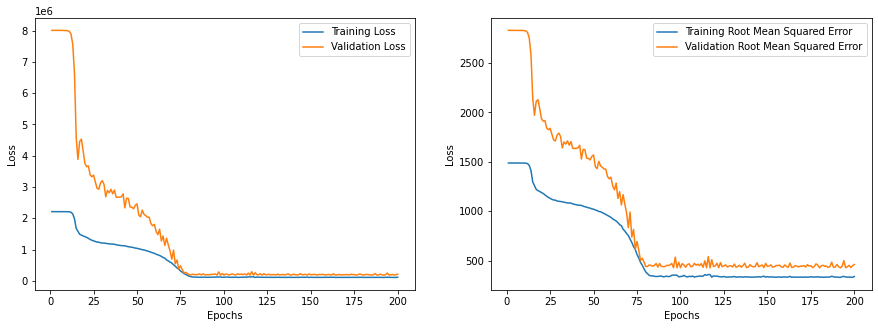

In [11]:
ETH_Model = Model()
ETH_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
ETH_hist = ETH_Model.fit(ETH_Train_X, ETH_Train_Y, epochs = 200, validation_data = (ETH_Val_X, ETH_Val_Y), callbacks = [callback])
#plotting 
historyDict = ETH_hist.history

loss = historyDict["loss"]
root_mean_squared_error = historyDict["root_mean_squared_error"]
valLoss = historyDict["val_loss"]
val_root_mean_squared_error = historyDict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, valLoss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Model Testing

1/1 [==============================] - 0s 45ms/step
RMSE: 356.26163360396055
MAPE: 21.54748302496516


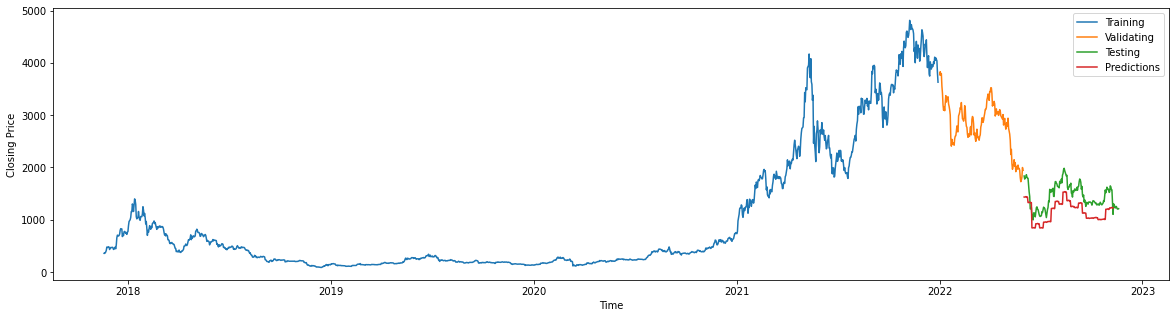

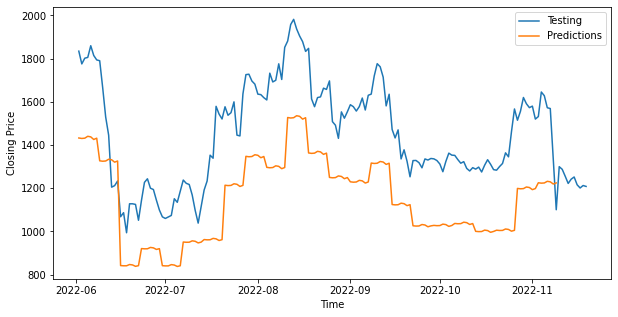

In [13]:
ETH_prediction = ETH_Model.predict(ETH_Test_X)

plt.figure(figsize = (20, 5))

plt.plot(ETH['Date'][ETH['Date'] < '2021-12-30'], ETH['Close'][ETH['Date'] < '2021-12-30'], label = 'Training')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], ETH['Close'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], label = 'Validating')
plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-06-02')&(ETH['Date'] <= '2022-11-09')], ETH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

plt.figure(figsize = (10, 5))

plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-06-02')&(ETH['Date'] <= '2022-11-09')], ETH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
#error calculations 
rmse = math.sqrt(mean_squared_error(ETH_Test_Y.reshape(-1,7), ETH_prediction))
mape = np.mean(np.abs(ETH_Test_Y.reshape(-1,7) - ETH_prediction )/np.abs(ETH_Test_Y.reshape(-1,7))) * 100
print(f'RMSE: {rmse}') #lower is better
print(f'MAPE: {mape}')

## GRU-LSTM 3
With closing price and volume of trading (both normalized), 1 week prediction window

### Data processing
Splitting data into training, validation and testing sets

1502
151
171
1653
(1653,)
1824
(1824,)
1
(1, 1824)
1502
151
171
1653
(1653,)
1824
(1824,)
1
(1, 1824)
[[[0.05355683 0.0134462 ]
  [0.05440739 0.013591  ]
  [0.05343868 0.01661593]
  [0.05390291 0.01929817]
  [0.05044105 0.02484161]
  [0.048566   0.03341374]
  [0.04536657 0.03368935]]

 [[0.04392827 0.02205834]
  [0.0448628  0.01696515]
  [0.04380218 0.02686951]
  [0.04600449 0.02092186]
  [0.04791034 0.02291815]
  [0.04614908 0.02103605]
  [0.04702585 0.01865452]]

 [[0.04731751 0.01323137]
  [0.04760721 0.01307449]
  [0.04563785 0.01697839]
  [0.04495193 0.01791345]
  [0.04398301 0.01813802]
  [0.04263751 0.01464243]
  [0.03634104 0.03685569]]

 [[0.03417088 0.03764434]
  [0.0360158  0.02266868]
  [0.03467057 0.03881496]
  [0.03489196 0.0222537 ]
  [0.03506379 0.02919967]
  [0.03442406 0.02218046]
  [0.03618704 0.02017197]]

 [[0.0368973  0.01536608]
  [0.03698796 0.013068  ]
  [0.03819291 0.01895062]
  [0.03966816 0.01814822]
  [0.03811584 0.0190855 ]
  [0.03806339 0.01754395]
  [0.0

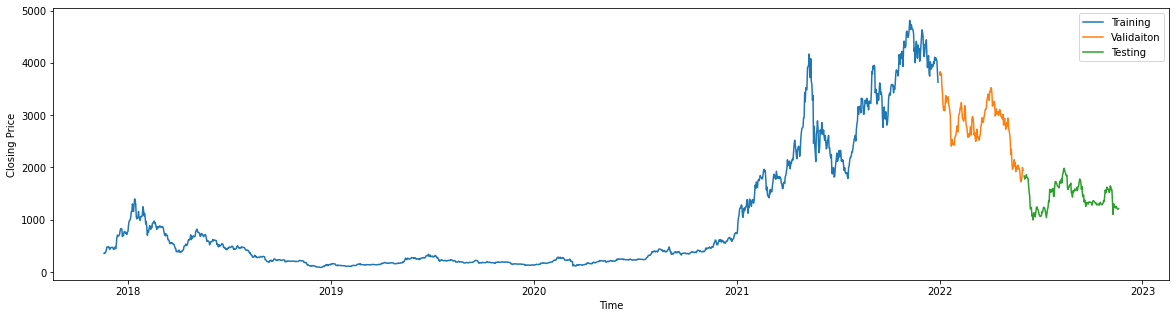

In [28]:
def Dataset(Data): #function for creation of traning and testing datasets for the models

  Data["Date"] = pd.to_datetime(Data["Date"])

  #Data for Training 
  #From 2018 to 2022
  Train_DataY = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy() #taking data befor the given date
  TrainingData = []
  TrainingDataX = []
  TrainingDataY = []

  #0+
  Train_Data = Data['Close'][Data['Date'] < '2021-12-30'].to_numpy()
  
  #1502+
  Train_Data_Val = Data['Close'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy()
  
  #1652+
  Train_Data_Test = Data['Close'][Data['Date'] >= '2022-06-02'].to_numpy()
  
  Train_Data = np.append(Train_Data,  Train_Data_Val)
  Train_Data = np.append(Train_Data,  Train_Data_Test)

  #Normalize
  Train_Data = Train_Data.reshape(1, -1)
  Train_Data = preprocessing.normalize(Train_Data)

  #0+
  Volume_Data = Data['Volume'][Data['Date'] < '2021-12-30'].to_numpy()
  
  #1502+
  Volume_Data_Val = Data['Volume'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy()
  
  #1652+
  Volume_Data_Test = Data['Volume'][Data['Date'] >= '2022-06-02'].to_numpy()
  
  Volume_Data = np.append(Volume_Data,  Volume_Data_Val)
  Volume_Data = np.append(Volume_Data,  Volume_Data_Test)

  #Normalize
  Volume_Data = Volume_Data.reshape(1, -1)
  Volume_Data = preprocessing.normalize(Volume_Data)

  #The training output of the model in TrainingDataY
  for i in range(0, len(Train_DataY), 7): #putting in close values data in form of weeks aka 7 days
    try:
      TrainingData.append(Train_DataY[i : i+7]) #array of arrays of 7 close prices
    except:
      pass

  if len(TrainingData[-1]) < 7: #If last week is less then 7 days we remove last week
    TrainingData.pop(-1)

  TrainingDataY = TrainingData[1:len(TrainingData)] # Taking all but first element
  TrainingDataY = np.array(TrainingDataY)
  TrainingDataY = TrainingDataY.reshape((-1, 7, 1)) #split into groups of 7

  #The training input for the model in TrainingDataX
  TrainingDataXWV = np.zeros((213, 7, 2))

  counter = 0
  for i in range(213):
    for l in range(7): 
      TrainingDataXWV[i,l,0] = Train_Data[0,counter]
      TrainingDataXWV[i,l,1] = Volume_Data[0,counter]
      counter += 1

  TrainingDataX = TrainingDataXWV

  #Data for Validation
  #From 2022 to 2022-06
  Val_Data = Data['Close'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy() #taking data from given date to latest date
  ValData = []
  ValDataX = []
  ValDataY = []

  #Volume_Data = Data['Volume'][(Data['Date'] >= '2022-01-01') & (Data['Date'] < '2022-06-01')].to_numpy() #taking data from given date to latest date

  for i in range(0, len(Val_Data), 7): #putting in close values data in form of weeks aka 7 days
    try:
      ValData.append(Val_Data[i : i+7]) #array of arrays of 7 close prices
    except:
      pass

  if len(ValData[-1]) < 7: #If last week is less then 7 days we remove last week
    ValData.pop(-1)

  ValDataY = ValData[1 : len(ValData)]
  ValDataY = np.array(ValDataY)
  ValDataY = ValDataY.reshape((-1, 7, 1))

  #The training input for the model in TrainingDataX
  ValDataXWV = np.zeros((20, 7, 2))

  counter = 0
  for i in range(20):
    for l in range(7):
      ValDataXWV[i,l,0] = Train_Data[0,1502+counter]
      ValDataXWV[i,l,1] = Volume_Data[0,1502+counter]
      counter += 1

  ValDataX = ValDataXWV

  #Data for Testing 
  #From 2022-06 to the end

  Test_Data = Data['Close'][Data['Date'] >= '2022-06-02'].to_numpy()
  TestData = []
  TestDataX = []
  TestDataY = []

  #Volume_Data = Data['Volume'][Data['Date'] >= '2022-06-02'].to_numpy()

  for i in range(0, len(Test_Data), 7): #putting in close values data in form of weeks aka 7 days
    try:
      TestData.append(Test_Data[i : i+7]) #array of arrays of 7 close prices
    except:
      pass

  if len(TestData[-1]) < 7: #If last week is less then 7 days we remove last week
    TestData.pop(-1)

  TestDataY = TestData[1 : len(TestData)]
  TestDataY = np.array(TestDataY)
  TestDataY = TestDataY.reshape((-1, 7, 1))

  #The training input for the model in TrainingDataX
  TestDataXWV = np.zeros((23, 7, 2))
  
  counter = 0
  for i in range(23):
    for l in range(7):
      #TrainingDataX[i, l].append(Volume_Data[counter]) 
      TestDataXWV[i,l,0] = Train_Data[0,1653+counter]
      TestDataXWV[i,l,1] = Volume_Data[0,1653+counter]
      counter += 1

  TestDataX = TestDataXWV
 
  return TrainingDataX, TrainingDataY, ValDataX, ValDataY, TestDataX, TestDataY

ETH_Train_X, ETH_Train_Y, ETH_Val_X, ETH_Val_Y, ETH_Test_X, ETH_Test_Y = Dataset(ETH)
#The graph shows how data is devided into Training Validation and Testing
plt.figure(figsize = (20, 5))

plt.plot(ETH['Date'][ETH['Date'] < '2021-12-30'], ETH['Close'][ETH['Date'] < '2021-12-30'], label = 'Training')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], ETH['Close'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], label = 'Validaiton')
plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

### Model

In [29]:
def Model():
#The input shape is going to be 14 total 7 close and 7 volume
  model = tf.keras.models.Sequential([ #input shape first number is number of days we will predict and second one is number of purumenters use for prediction
      tf.keras.layers.GRU(200, input_shape = (7,2), activation = tf.nn.leaky_relu, return_sequences = True),
      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu), #or make in 150 if it will not work
      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
      tf.keras.layers.Dense(7, activation = tf.nn.leaky_relu)
  ])

  return model

model = Model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 7, 200)            122400    
                                                                 
 lstm_10 (LSTM)              (None, 200)               320800    
                                                                 
 dense_30 (Dense)            (None, 100)               20100     
                                                                 
 dense_31 (Dense)            (None, 50)                5050      
                                                                 
 dense_32 (Dense)            (None, 7)                 357       
                                                                 
Total params: 468,707
Trainable params: 468,707
Non-trainable params: 0
_________________________________________________________________


### Learning Rate

In [30]:
def scheduler(epoch):
  if epoch <= 125:
    lrate = 0.00015
  else:
    lrate = 0.00009

  return lrate

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

### Model Fitting

Epoch 1/200
7/7 [==============================] - 4s 116ms/step - loss: 2212386.7500 - root_mean_squared_error: 1487.4094 - val_loss: 8007296.0000 - val_root_mean_squared_error: 2829.7163 - lr: 1.5000e-04
Epoch 2/200
7/7 [==============================] - 0s 49ms/step - loss: 2212368.7500 - root_mean_squared_error: 1487.4033 - val_loss: 8007229.0000 - val_root_mean_squared_error: 2829.7046 - lr: 1.5000e-04
Epoch 3/200
7/7 [==============================] - 0s 50ms/step - loss: 2212342.5000 - root_mean_squared_error: 1487.3947 - val_loss: 8007129.0000 - val_root_mean_squared_error: 2829.6870 - lr: 1.5000e-04
Epoch 4/200
7/7 [==============================] - 0s 50ms/step - loss: 2212303.2500 - root_mean_squared_error: 1487.3813 - val_loss: 8006967.0000 - val_root_mean_squared_error: 2829.6587 - lr: 1.5000e-04
Epoch 5/200
7/7 [==============================] - 0s 49ms/step - loss: 2212236.5000 - root_mean_squared_error: 1487.3589 - val_loss: 8006687.0000 - val_root_mean_squared_error: 2

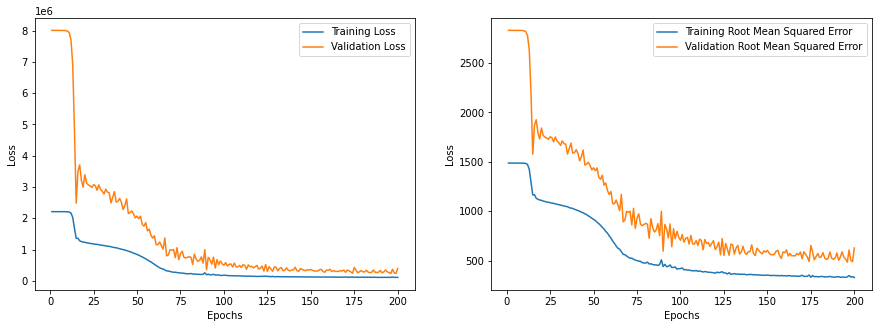

In [31]:
ETH_Model = Model()
ETH_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
ETH_hist = ETH_Model.fit(ETH_Train_X, ETH_Train_Y, epochs = 200, validation_data = (ETH_Val_X, ETH_Val_Y), callbacks = [callback])
#plotting
historyDict = ETH_hist.history

loss = historyDict["loss"]
root_mean_squared_error = historyDict["root_mean_squared_error"]
valLoss = historyDict["val_loss"]
val_root_mean_squared_error = historyDict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, valLoss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Model Testing

1/1 [==============================] - 0s 347ms/step
RMSE: 391.54303490935587
MAPE: 23.6191136018892


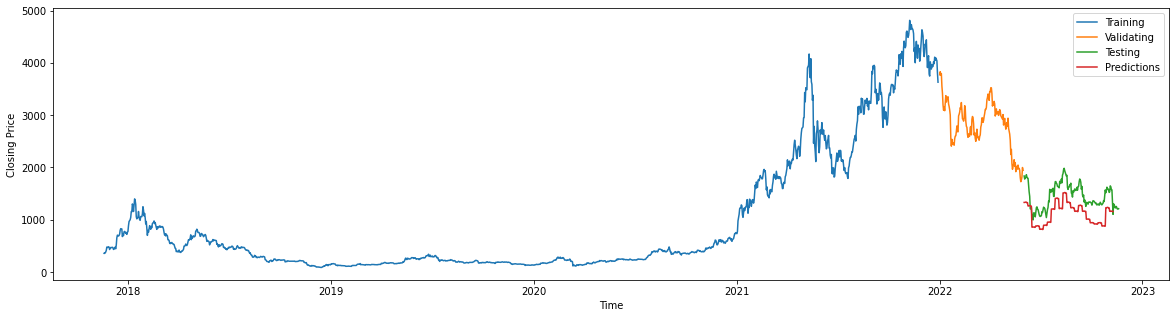

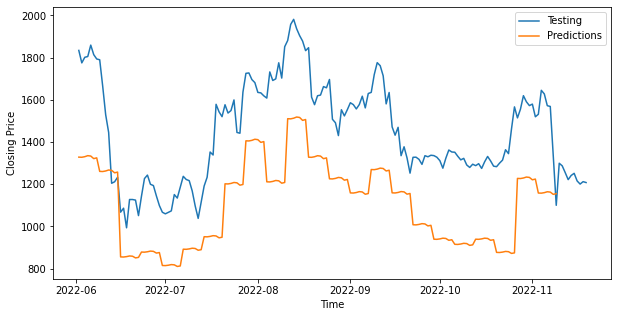

In [32]:
ETH_prediction = ETH_Model.predict(ETH_Test_X)
#plotting prediction
plt.figure(figsize = (20, 5))

plt.plot(ETH['Date'][ETH['Date'] < '2021-12-30'], ETH['Close'][ETH['Date'] < '2021-12-30'], label = 'Training')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], ETH['Close'][(ETH['Date'] >= '2022-01-01') & (ETH['Date'] < '2022-06-01')], label = 'Validating')
plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-06-02')&(ETH['Date'] <= '2022-11-09')], ETH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

plt.figure(figsize = (10, 5))

plt.plot(ETH['Date'][ETH['Date'] >= '2022-06-02'], ETH['Close'][ETH['Date'] >= '2022-06-02'], label = 'Testing')
plt.plot(ETH['Date'][(ETH['Date'] >= '2022-06-02')&(ETH['Date'] <= '2022-11-09')], ETH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
#error calculations 
rmse = math.sqrt(mean_squared_error(ETH_Test_Y.reshape(-1,7), ETH_prediction))
mape = np.mean(np.abs(ETH_Test_Y.reshape(-1,7) - ETH_prediction )/np.abs(ETH_Test_Y.reshape(-1,7))) * 100
print(f'RMSE: {rmse}') #lower is better
print(f'MAPE: {mape}')